# Periodicity Analysis

To verify whether periodicity in the Covid-19 data from the Uk is a product of the reporting process, or due to some phenomenan in the underlying processes.

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import fftpack
import matplotlib.pyplot as plt
from phe_api import retrieve_data

import periodic_sampling as ps

In [3]:
# Read in data

regions_list = ['north east', 'north west', 'yorkshire and the humber', 'east midlands', 'west midlands', 'east of england', 'london', 'south east', 'south west']
regions_dfs = []

for region in regions_list:
    df = pd.DataFrame(retrieve_data(area_name=region, area_type='region'))
    df["Date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
    df.sort_values(by="Date", inplace=True)
    df = df[df["Date"] < "2022-02-01"]
    regions_dfs.append(df)

## Weekly Patterns
We can identify periodic, weekly variation in the observed reporting factor.

/tmp/ipykernel_2072647/2662347530.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.flatten()[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


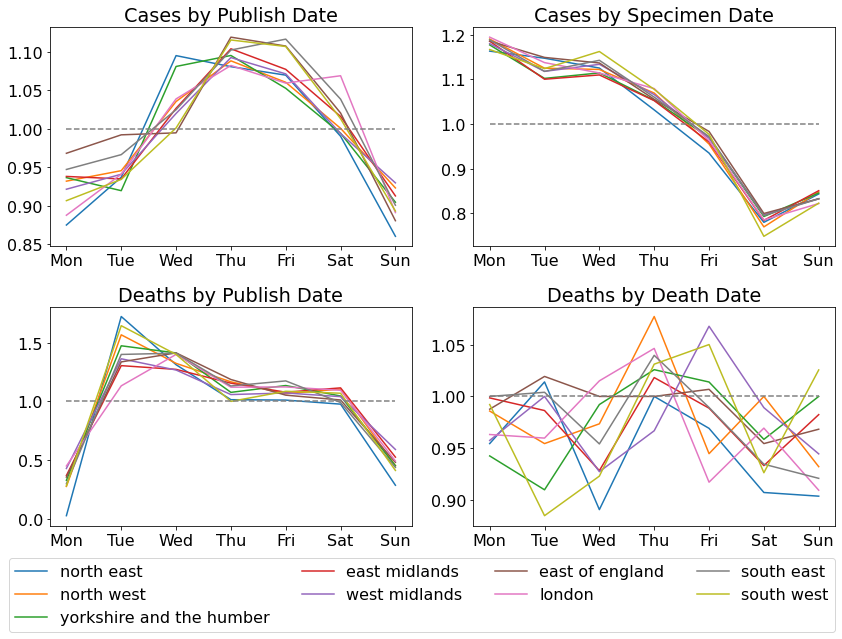

In [21]:
plt.rcParams['font.size'] = '16'
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, df in enumerate(regions_dfs):
    df["Days"] = df["Date"].apply(lambda date: (date - min(df["Date"])).days)
    df = ps.analysis.rel_reporting_calc(df, ['newCasesByPublishDate', 'newCasesBySpecimenDate',
                             'newDeaths28DaysByDeathDate', 'newDeaths28DaysByPublishDate'])
    summary = df.groupby('Weekday').median().sort_values('Day_Index')
    axs[0,0].plot(summary.index, summary['Dif_newCasesByPublishDate'], label=regions_list[i])
    axs[0,1].plot(summary.index, summary['Dif_newCasesBySpecimenDate'], label=regions_list[i])
    axs[1,0].plot(summary.index, summary['Dif_newDeaths28DaysByPublishDate'], label=regions_list[i])
    axs[1,1].plot(summary.index, summary['Dif_newDeaths28DaysByDeathDate'], label=regions_list[i])

for i in range(4):
    axs.flatten()[i].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axs.flatten()[i].hlines(y=1, xmin=0, xmax=6, linestyles="dashed", color="gray")
axs[0, 0].set_title('Cases by Publish Date'); axs[0, 1].set_title('Cases by Specimen Date');
axs[1, 0].set_title('Deaths by Publish Date'); axs[1, 1].set_title('Deaths by Death Date');


handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.13))

fig.patch.set_facecolor('white'); fig.tight_layout()
# plt.savefig(f"../images/uk_phe_data/uk_regional_patterns.png")